In [1]:
#Import Library : 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import RMSprop

from keras.optimizers import adam_v2
from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import os


In [2]:
#Menghubungkan Google Colab dengan Google Drive : 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Path data train dan data testingnya : 
validation_path ='/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/validation'
training_path ='/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/training'


(256, 256, 3)

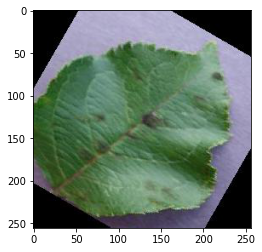

In [4]:
#melihat salah satu gambar dari data validation
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/validation/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG')
plt.imshow(img)

#melihat ukuran pixel dari salah satu gambar :
cv2.imread('/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/validation/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_new30degFlipLR.JPG').shape

In [54]:
#Normalisasi Data : 
training = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              validation_split=0.2)
validation = ImageDataGenerator(rescale=1./255)

training_dataset = training.flow_from_directory(training_path,
                                                target_size=(200,200),
                                                batch_size=32,
                                                class_mode='sparse')

validation_dataset = validation.flow_from_directory(validation_path,
                                                target_size=(200,200),
                                                batch_size=32,
                                                class_mode='sparse')

Found 7781 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


In [55]:
#Cek Klasifikasi pada tiap tiap label
training_dataset.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3}

In [56]:
#Melihat Klasifikasi pada tiap gambar 
training_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [57]:
#CNN MODEL 

model = tf.keras.models.Sequential([
                                    #Feature Extraction Layer
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    # Flatten feature map
                                    tf.keras.layers.Flatten(),

                                    # Fully Connected Layer
                                    tf.keras.layers.Dense(64,activation='relu'),

                                    tf.keras.layers.Dense(4,activation='softmax') 
])

#print model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)      

In [59]:
#Compile dengan menggunakan optimzer adam dan sparse_crossentropy untuk menghitung lossnya 
adam = adam_v2.Adam(learning_rate=0.001)
model.compile(adam, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [60]:
history = model.fit(training_dataset,
          steps_per_epoch=10,
          epochs=120,
          validation_data = validation_dataset)

Epoch 1/120
10/10 [==============================] - 34s 4s/step - loss: 1.6369 - accuracy: 0.2094 - val_loss: 1.3416 - val_accuracy: 0.2666
Epoch 2/120
10/10 [==============================] - 53s 6s/step - loss: 1.2706 - accuracy: 0.3906 - val_loss: 1.0747 - val_accuracy: 0.5363
Epoch 3/120
10/10 [==============================] - 32s 3s/step - loss: 0.9744 - accuracy: 0.6007 - val_loss: 0.7828 - val_accuracy: 0.7180
Epoch 4/120
10/10 [==============================] - 33s 3s/step - loss: 0.7802 - accuracy: 0.7188 - val_loss: 0.6921 - val_accuracy: 0.7375
Epoch 5/120
10/10 [==============================] - 33s 4s/step - loss: 0.5943 - accuracy: 0.7875 - val_loss: 0.8634 - val_accuracy: 0.6655
Epoch 6/120
10/10 [==============================] - 33s 3s/step - loss: 0.6758 - accuracy: 0.7719 - val_loss: 0.8363 - val_accuracy: 0.6366
Epoch 7/120
10/10 [==============================] - 33s 4s/step - loss: 0.7509 - accuracy: 0.6906 - val_loss: 0.5743 - val_accuracy: 0.7952
Epoch 8/120
1

In [63]:
#save weightnya 
filepath="/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/model_last.hdf5"
model.save(filepath)

#model.load_weights('/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/machineLearning_model_save.hdf5')

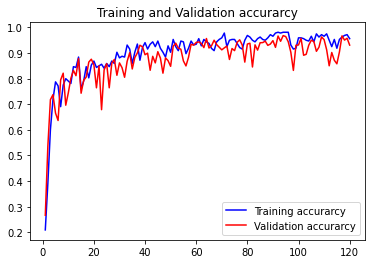

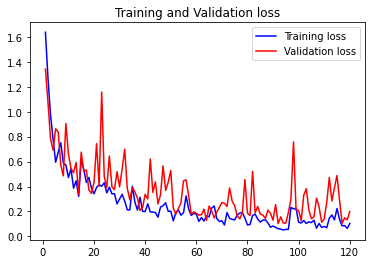

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [62]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_dataset)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
61/61 [==============================] - 21s 343ms/step - loss: 0.1995 - accuracy: 0.9310
Test Accuracy: 93.1034505367279


In [64]:
#Memasukkan Jenis jenis data ke dalam variable li 
class_dict = training_dataset.class_indices
li = list(class_dict.keys())

Hasil Prediksi :


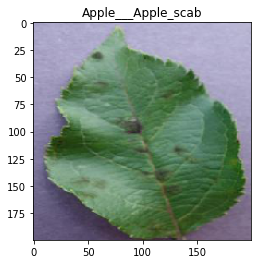

In [67]:
# predicting an image

image_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/training/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

new_img = image.load_img(image_path, target_size=(200, 200))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255 #normalisasi

print("Hasil Prediksi :")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
#plt.axis('off')
plt.title(class_name)
plt.show()  


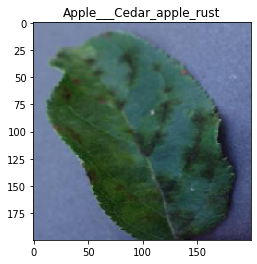

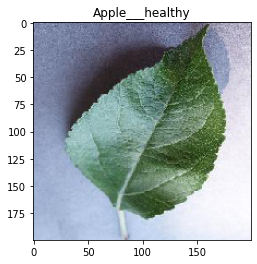

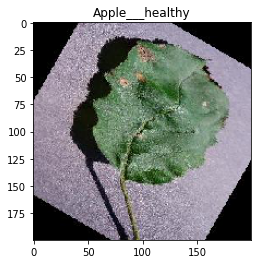

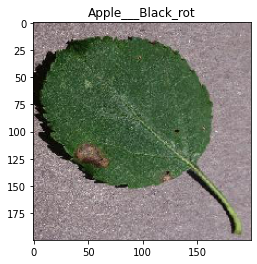

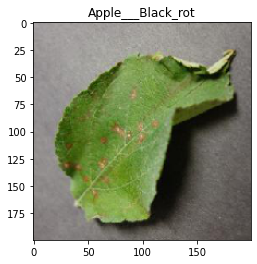

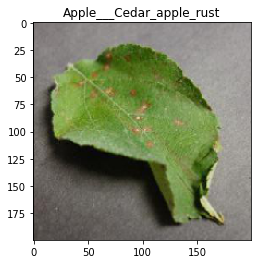

In [66]:
#prediksi dalam beberapa gambar
image_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Proyek/testing'

for i in os.listdir(image_path):
  prediction = model.predict(img)
  new_img = image.load_img(image_path+'//'+i, target_size=(200, 200))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  d = prediction.flatten()
  j = d.max()
  for index,item in enumerate(d):
      if item == j:
          class_name = li[index]

  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  #plt.axis('off')
  plt.title(class_name)
  plt.show()  

  